## Import dependencies

In [1]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import scipy.stats as st

In [2]:
#!wget https://raw.githubusercontent.com/M-Media-Group/country-json/master/src/countries-master.json

--2021-08-07 11:31:32--  https://raw.githubusercontent.com/M-Media-Group/country-json/master/src/countries-master.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73528 (72K) [text/plain]
Saving to: ‘countries-master.json’

countries-master.js 100%[===================>]  71.80K  --.-KB/s    in 0.04s   

2021-08-07 11:31:32 (1.90 MB/s) - ‘countries-master.json’ saved [73528/73528]



In [2]:
with open('countries-master.json','r') as f:
    countries_data = json.load(f)

In [3]:
countries_df = pd.DataFrame(countries_data)
print(f'There are {len(countries_df)} entries.')
countries_df.head()

There are 243 entries.


,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city
0,Afghanistan,35530081,652090.0,45.9,None,Asia,AF,Southern and Central Asia,4,Kabul
1,Albania,2930187,28748.0,71.6,None,Europe,AL,Southern Europe,8,Tirana
2,Algeria,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12,Alger
3,American Samoa,55641,199.0,75.1,None,Oceania,AS,Polynesia,16,Fagatogo
4,Andorra,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20,Andorra la Vella


In [4]:
case_base_url = 'https://covid-api.mmediagroup.fr/v1/cases'
case_data = requests.get(case_base_url).json()

In [5]:
print(f'There are {len(case_data)} entries.')

There are 196 entries.


In [6]:
country = []
confirmed = []
deaths = []
for key,value in case_data.items():
    country.append(key)
    try:
        confirmed.append(value['All']['confirmed'])
    except KeyError:
        confirmed.append(np.nan)
    try:
        deaths.append(value['All']['deaths'])
    except KeyError:
        deaths.append(np.nan)

In [7]:
case_df = pd.DataFrame()
case_df['country'] = country
case_df['confirmed'] = confirmed
case_df['deaths'] = deaths
case_df.head()

,country,confirmed,deaths
0,Afghanistan,151013,6961
1,Albania,134201,2460
2,Algeria,183347,4618
3,Andorra,14873,129
4,Angola,43890,1057


In [8]:
country_case_df = case_df.merge(countries_df,on='country')

In [9]:
print(f'There are {len(country_case_df)} entries.')
country_case_df.head()

There are 180 entries.


,country,confirmed,deaths,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city
0,Afghanistan,151013,6961,35530081,652090.0,45.9,None,Asia,AF,Southern and Central Asia,4,Kabul
1,Albania,134201,2460,2930187,28748.0,71.6,None,Europe,AL,Southern Europe,8,Tirana
2,Algeria,183347,4618,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12,Alger
3,Andorra,14873,129,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20,Andorra la Vella
4,Angola,43890,1057,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24,Luanda


In [10]:
country_case_df['population'] = country_case_df['population'].astype(int)
country_case_df['sq_km_area'] = country_case_df['sq_km_area'].astype(float)
country_case_df['life_expectancy'] = country_case_df['life_expectancy'].astype(float)

In [11]:
country_case_df['percentage_confirmed_%'] = country_case_df['confirmed']/country_case_df['population'] * 100
country_case_df['percentage_deaths_%'] = country_case_df['deaths']/country_case_df['population'] * 100

In [12]:
country_case_df.head()

,country,confirmed,deaths,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,Afghanistan,151013,6961,35530081,652090.0,45.9,None,Asia,AF,Southern and Central Asia,4,Kabul,0.425029,0.019592
1,Albania,134201,2460,2930187,28748.0,71.6,None,Europe,AL,Southern Europe,8,Tirana,4.579947,0.083954
2,Algeria,183347,4618,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12,Alger,0.443745,0.011177
3,Andorra,14873,129,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20,Andorra la Vella,19.324368,0.167609
4,Angola,43890,1057,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24,Luanda,0.147360,0.003549


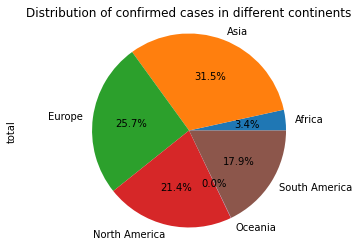

In [13]:
# Generate a pie plot showing the distribution of confirmed cases in different continents
continent_data = country_case_df.groupby('continent').agg(total = ('confirmed','sum'))
continent_data.plot.pie(y='total',autopct = '%1.1f%%',legend=False)
plt.title('Distribution of confirmed cases in different continents')
plt.axis('equal')
plt.show()

In [14]:
country_case_df.to_csv('country_case_df.csv')

In [15]:
WHR2020 = "../WHR2020_Data.csv"
WHR2021 = "../WHR2021_Data.csv"

In [16]:
data20 = pd.read_csv(WHR2020)
data21 = pd.read_csv(WHR2021)

In [17]:
print(len(data20))
data20.head()

153


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [18]:
print(len(data21))
data21.head()

149


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [19]:
happiness_20 = data20[['Country name','Regional indicator','Ladder score']]
happiness_21 = data21[['Country name','Regional indicator','Ladder score']]

In [20]:
happiness_df = happiness_20.merge(happiness_21,on = ['Country name','Regional indicator'],suffixes=('_20', '_21'))

In [21]:
print(len(happiness_df))
happiness_df.head()

148


,Country name,Regional indicator,Ladder score_20,Ladder score_21
0,Finland,Western Europe,7.8087,7.842
1,Denmark,Western Europe,7.6456,7.620
2,Switzerland,Western Europe,7.5599,7.571
3,Iceland,Western Europe,7.5045,7.554
4,Norway,Western Europe,7.4880,7.392


In [22]:
country_case_df.head()

,country,confirmed,deaths,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,Afghanistan,151013,6961,35530081,652090.0,45.9,None,Asia,AF,Southern and Central Asia,4,Kabul,0.425029,0.019592
1,Albania,134201,2460,2930187,28748.0,71.6,None,Europe,AL,Southern Europe,8,Tirana,4.579947,0.083954
2,Algeria,183347,4618,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12,Alger,0.443745,0.011177
3,Andorra,14873,129,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20,Andorra la Vella,19.324368,0.167609
4,Angola,43890,1057,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24,Luanda,0.147360,0.003549


In [32]:
covid_df = country_case_df[['country','continent','population','confirmed','deaths','percentage_confirmed_%','percentage_deaths_%']]
all_df = covid_df.merge(happiness_df, left_on = ['country'],right_on = ['Country name'])

In [33]:
print(len(all_df))
all_df.head()

133


,country,continent,population,confirmed,deaths,percentage_confirmed_%,percentage_deaths_%,Country name,Regional indicator,Ladder score_20,Ladder score_21
0,Afghanistan,Asia,35530081,151013,6961,0.425029,0.019592,Afghanistan,South Asia,2.5669,2.523
1,Albania,Europe,2930187,134201,2460,4.579947,0.083954,Albania,Central and Eastern Europe,4.8827,5.117
2,Algeria,Africa,41318142,183347,4618,0.443745,0.011177,Algeria,Middle East and North Africa,5.0051,4.887
3,Argentina,South America,44271041,5041487,108165,11.387776,0.244325,Argentina,Latin America and Caribbean,5.9747,5.929
4,Armenia,Asia,2930450,232610,4658,7.937689,0.158952,Armenia,Commonwealth of Independent States,4.6768,5.283


In [34]:
all_df = all_df.drop(columns=['Country name', 'Regional indicator'])
all_df = all_df.rename(columns = {'Ladder score_20':'happiness_pre_pandemic','Ladder score_21':'happiness_pandemic'})
all_df['happiness_diff'] = all_df['happiness_pandemic'] - all_df['happiness_pre_pandemic']

In [35]:
all_df

,country,continent,population,confirmed,deaths,percentage_confirmed_%,percentage_deaths_%,happiness_pre_pandemic,happiness_pandemic,happiness_diff
0,Afghanistan,Asia,35530081,151013,6961,0.425029,0.019592,2.5669,2.523,-0.0439
1,Albania,Europe,2930187,134201,2460,4.579947,0.083954,4.8827,5.117,0.2343
2,Algeria,Africa,41318142,183347,4618,0.443745,0.011177,5.0051,4.887,-0.1181
3,Argentina,South America,44271041,5041487,108165,11.387776,0.244325,5.9747,5.929,-0.0457
4,Armenia,Asia,2930450,232610,4658,7.937689,0.158952,4.6768,5.283,0.6062
...,...,...,...,...,...,...,...,...,...,...
128,Venezuela,South America,31977065,313584,3719,0.980653,0.011630,5.0532,4.892,-0.1612
129,Vietnam,Asia,95540800,224894,3757,0.235391,0.003932,5.3535,5.411,0.0575
130,Yemen,Asia,28250420,7198,1391,0.025479,0.004924,3.5274,3.658,0.1306
131,Zambia,Africa,17094130,200830,3499,1.174848,0.020469,3.7594,4.073,0.3136


In [36]:
all_df.to_csv('all_df.csv')

## Correlation between happiness and confirmed cases

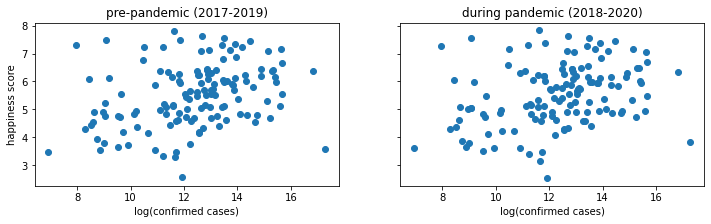

In [28]:
plt.rcParams['figure.figsize'] = [12, 3]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x = np.log(all_df['confirmed']), y=all_df['happiness_pre_pandemic'])
ax2.scatter(x = np.log(all_df['confirmed']), y=all_df['happiness_pandemic'])
ax1.set_title('pre-pandemic (2017-2019)')
ax2.set_title('during pandemic (2018-2020)')
ax1.set_xlabel('log(confirmed cases)')
ax2.set_xlabel('log(confirmed cases)')
ax1.set_ylabel('happiness score')
plt.savefig('happiness_vs_cases.png')
plt.show()

### Correlation between happiness and confirmed cases (linear regression)

The r-squared is: 0.1006969775048275


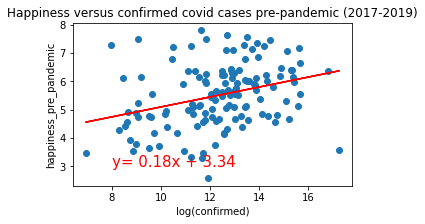

In [29]:
plt.rcParams['figure.figsize'] = [5, 3]
x_values = np.log(all_df['confirmed'])
y_values = all_df['happiness_pre_pandemic']
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq_1 = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_1,(8,3),fontsize =15,color = 'red')
plt.xlabel('log(confirmed)')
plt.ylabel('happiness_pre_pandemic')
plt.title('Happiness versus confirmed covid cases pre-pandemic (2017-2019)')
print(f'The r-squared is: {rvalue ** 2}')
plt.show()

The r-squared is: 0.09969050907905723


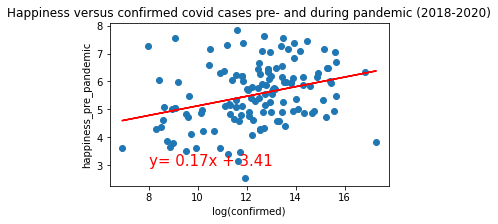

In [30]:
plt.rcParams['figure.figsize'] = [5, 3]
x_values = np.log(all_df['confirmed'])
y_values = all_df['happiness_pandemic']
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq_2 = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_2,(8,3),fontsize =15,color = 'red')
plt.xlabel('log(confirmed)')
plt.ylabel('happiness_pre_pandemic')
plt.title('Happiness versus confirmed covid cases pre- and during pandemic (2018-2020)')
print(f'The r-squared is: {rvalue ** 2}')
plt.show()

## Correlation between happiness and percentage confirmed 

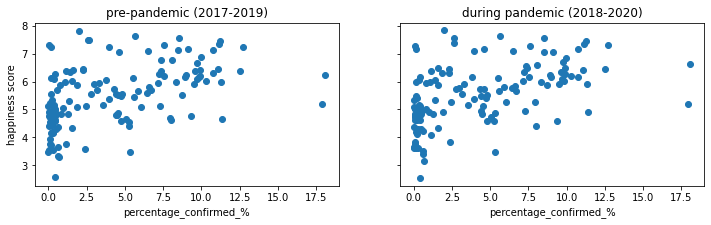

In [31]:
plt.rcParams['figure.figsize'] = [12, 3]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x = all_df['percentage_confirmed_%'], y=all_df['happiness_pre_pandemic'])
ax2.scatter(x = all_df['percentage_confirmed_%'], y=all_df['happiness_pandemic'])
ax1.set_title('pre-pandemic (2017-2019)')
ax2.set_title('during pandemic (2018-2020)')
ax1.set_xlabel('percentage_confirmed_%')
ax2.set_xlabel('percentage_confirmed_%')
ax1.set_ylabel('happiness score')
plt.savefig('happiness_vs_cases_percentage.png')
plt.show()

### linear regression

The r-squared is: 0.224199918852718


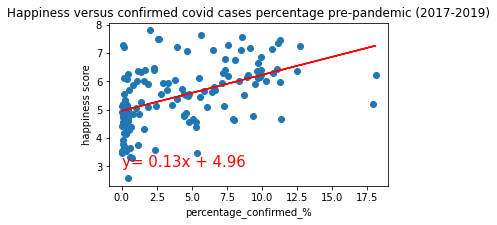

In [32]:
plt.rcParams['figure.figsize'] = [5, 3]
x_values = all_df['percentage_confirmed_%']
y_values = all_df['happiness_pre_pandemic']
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,3),fontsize =15,color = 'red')
plt.xlabel('percentage_confirmed_%')
plt.ylabel('happiness score')
print(f'The r-squared is: {rvalue ** 2}')
plt.title('Happiness versus confirmed covid cases percentage pre-pandemic (2017-2019)')
plt.savefig('happiness_vs_cases_20.png')
plt.show()

The r-squared is: 0.24479145021638665


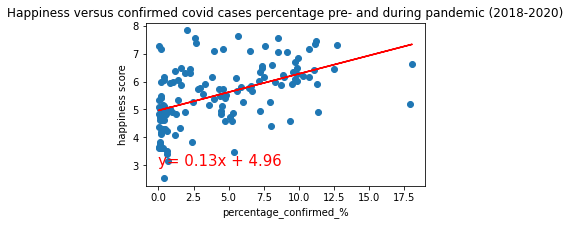

In [33]:
plt.rcParams['figure.figsize'] = [5, 3]
x_values = all_df['percentage_confirmed_%']
y_values = all_df['happiness_pandemic']
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,3),fontsize =15,color = 'red')
plt.xlabel('percentage_confirmed_%')
plt.ylabel('happiness score')
print(f'The r-squared is: {rvalue ** 2}')
plt.title('Happiness versus confirmed covid cases percentage pre- and during pandemic (2018-2020)')
plt.savefig('happiness_vs_cases_21.png')
plt.show()

## Correlation between happiness and death cases

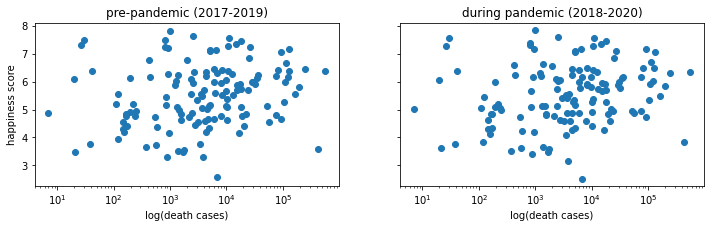

In [34]:
plt.rcParams['figure.figsize'] = [12, 3]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x = all_df['deaths'], y=all_df['happiness_pre_pandemic'])
ax2.scatter(x = all_df['deaths'], y=all_df['happiness_pandemic'])
ax1.set_title('pre-pandemic (2017-2019)')
ax2.set_title('during pandemic (2018-2020)')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel('log(death cases)')
ax2.set_xlabel('log(death cases)')
ax1.set_ylabel('happiness score')
plt.savefig('happiness_vs_deaths.png')
plt.show()

## Correlation between happiness and percentage of deaths

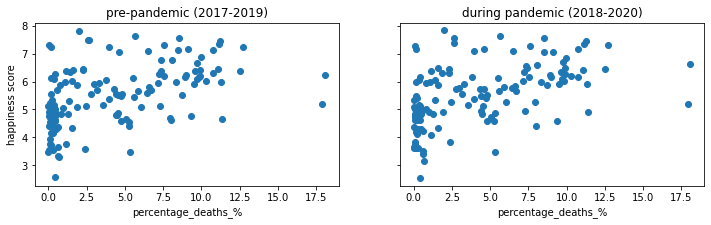

In [37]:
plt.rcParams['figure.figsize'] = [12, 3]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x = all_df['percentage_confirmed_%'], y=all_df['happiness_pre_pandemic'])
ax2.scatter(x = all_df['percentage_confirmed_%'], y=all_df['happiness_pandemic'])
ax1.set_title('pre-pandemic (2017-2019)')
ax2.set_title('during pandemic (2018-2020)')
ax1.set_xlabel('percentage_deaths_%')
ax2.set_xlabel('percentage_deaths_%')
ax1.set_ylabel('happiness score')
plt.savefig('happiness_vs_deaths_percentage.png')
plt.show()

## Relationship between happiness difference (2021 - 2020) and Covid cases percentage

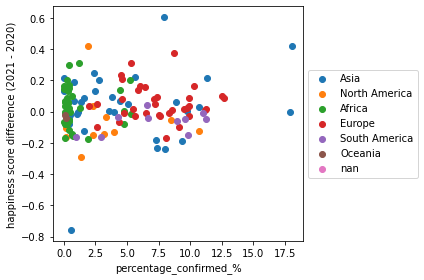

In [57]:
plt.rcParams['figure.figsize'] = [6, 4]
fig, ax = plt.subplots()
for continent in all_df['continent'].unique():
    ax.scatter(all_df[all_df['continent'] == continent]['percentage_confirmed_%'],
           all_df[all_df['continent'] == continent]['happiness_diff'],label = continent)
ax.set_xlabel('percentage_confirmed_%')
ax.set_ylabel('happiness score difference (2021 - 2020)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('happiness_diff_vs_case_percentage.png')
plt.show()

In [47]:
all_df.sort_values(['happiness_diff'],inplace = True)
all_df

,country,continent,confirmed,deaths,percentage_confirmed_%,percentage_deaths_%,happiness_pre_pandemic,happiness_pandemic,happiness_diff
95,Pakistan,Asia,1063125,23797,0.539614,0.012079,5.6933,4.934,-0.7593
35,El Salvador,North America,88371,2703,1.385592,0.042381,6.3483,6.061,-0.2873
61,Jordan,Asia,776178,10116,7.999894,0.104263,4.6334,4.395,-0.2384
124,United Arab Emirates,Asia,691554,1971,7.356844,0.020968,6.7908,6.561,-0.2298
68,Lebanon,Asia,568505,7932,9.346788,0.130410,4.7715,4.584,-0.1875
...,...,...,...,...,...,...,...,...,...
123,Ukraine,Europe,2343046,55836,5.298258,0.126260,4.5607,4.875,0.3143
29,Croatia,Europe,364832,8271,8.708552,0.197429,5.5047,5.882,0.3773
59,Jamaica,North America,54165,1214,1.874028,0.042003,5.8898,6.309,0.4192
8,Bahrain,Asia,269848,1384,18.079250,0.092725,6.2273,6.647,0.4197


## Table sorted by the happiness difference

In [60]:
all_df.sort_values('happiness_diff',inplace=True)
all_df

,country,continent,confirmed,deaths,percentage_confirmed_%,percentage_deaths_%,happiness_pre_pandemic,happiness_pandemic,happiness_diff
95,Pakistan,Asia,1063125,23797,0.539614,0.012079,5.6933,4.934,-0.7593
35,El Salvador,North America,88371,2703,1.385592,0.042381,6.3483,6.061,-0.2873
61,Jordan,Asia,776178,10116,7.999894,0.104263,4.6334,4.395,-0.2384
124,United Arab Emirates,Asia,691554,1971,7.356844,0.020968,6.7908,6.561,-0.2298
68,Lebanon,Asia,568505,7932,9.346788,0.130410,4.7715,4.584,-0.1875
...,...,...,...,...,...,...,...,...,...
123,Ukraine,Europe,2343046,55836,5.298258,0.126260,4.5607,4.875,0.3143
29,Croatia,Europe,364832,8271,8.708552,0.197429,5.5047,5.882,0.3773
59,Jamaica,North America,54165,1214,1.874028,0.042003,5.8898,6.309,0.4192
8,Bahrain,Asia,269848,1384,18.079250,0.092725,6.2273,6.647,0.4197
